In [1]:
%matplotlib inline

import time
import json
import socket

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc

In [2]:
font = {'family' : 'serif',
        'size'   : '22',
       }

rc('font', **font) 
rc('text', usetex=True)
rc('axes', axisbelow=True)

## Load data into a Pandas dataframe

In [31]:
cdklm_cuda = (
    ("scripts/laptop/cdklm_cuda_git_versions_laptop_2018_10_11-17_57_28.npz", "840M"),
    ("scripts/met/cdklm_cuda_git_versions_met_2018_10_12-16_18_55.npz", "M2090"),
    ("scripts/abel/cdklm_cuda_git_versions_abel_2018_10_12-18_22_22.npz", "K20"),
    ("scripts/desktop/cdklm_cuda_git_versions_desktop_2018_10_11-16_39_52.npz", "GTX780"),
    ("scripts/amazon_k80/cdklm_cuda_git_versions_amazon_k80_2018_10_12-13_01_04.npz", "K80"),
    ("scripts/amazon_v100/cdklm_cuda_git_versions_amazon_v100_2018_10_12-21_15_12.npz", "V100"),
    #("supercomputer_fermi_cdklm_profiling.npz", "V100")
)

cdklm_opencl = (
    ("scripts/laptop/cdklm_opencl_git_versions_laptop_2018_10_12-15_04_36.npz", "840M"),
    ("scripts/met/cdklm_opencl_git_versions_met_2018_10_12-16_20_14.npz", "M2090"),
    ("scripts/abel/cdklm_opencl_git_versions_abel_2018_10_12-18_23_21.npz", "K20"),
    ("scripts/desktop/cdklm_opencl_git_versions_desktop_2018_10_12-14_58_02.npz", "GTX780"),
    ("scripts/amazon_k80/cdklm_opencl_git_versions_amazon_k80_2018_10_12-13_01_20.npz", "K80"),
    ("scripts/amazon_v100/cdklm_opencl_git_versions_amazon_v100_2018_10_12-21_15_19.npz", "V100"),
)

ctcs_cuda =  (
    ("scripts/laptop/ctcs_cuda_git_versions_laptop_2018_10_11-18_26_56.npz", "840M"),
    ("scripts/met/ctcs_cuda_git_versions_met_2018_10_12-16_22_59.npz", "M2090"),
    ("scripts/abel/ctcs_cuda_git_versions_abel_2018_10_12-18_25_57.npz", "K20"),
    ("scripts/desktop/ctcs_cuda_git_versions_desktop_2018_10_11-17_12_47.npz", "GTX780"),
    ("scripts/amazon_k80/ctcs_cuda_git_versions_amazon_k80_2018_10_12-13_02_19.npz", "K80"),
    ("scripts/amazon_v100/ctcs_cuda_git_versions_amazon_v100_2018_10_12-21_15_50.npz", "V100"),
)
ctcs_opencl =  (
    ("scripts/laptop/ctcs_opencl_git_versions_laptop_2018_10_12-15_03_29.npz", "840M"),
    ("scripts/met/ctcs_opencl_git_versions_met_2018_10_12-16_23_30.npz", "M2090"),
    ("scripts/abel/ctcs_opencl_git_versions_abel_2018_10_12-18_27_02.npz", "K20"),
    ("scripts/desktop/ctcs_opencl_git_versions_desktop_2018_10_12-09_44_56.npz", "GTX780"),
    ("scripts/amazon_k80/ctcs_opencl_git_versions_amazon_k80_2018_10_12-13_02_31.npz", "K80"),
    ("scripts/amazon_v100/ctcs_opencl_git_versions_amazon_v100_2018_10_12-21_15_58.npz", "V100"),
)

fbl_cuda = (
    ("scripts/laptop/fbl_cuda_git_versions_laptop_2018_10_11-18_43_38.npz", "840M"),
    ("scripts/met/fbl_cuda_git_versions_met_2018_10_12-16_25_14.npz", "M2090"),
    ("scripts/abel/fbl_cuda_git_versions_abel_2018_10_12-18_28_39.npz", "K20"),
    ("scripts/desktop/fbl_cuda_git_versions_desktop_2018_10_11-17_13_43.npz", "GTX780"),
    ("scripts/amazon_k80/fbl_cuda_git_versions_amazon_k80_2018_10_12-13_02_55.npz", "K80"),
    ("scripts/amazon_v100/fbl_cuda_git_versions_amazon_v100_2018_10_12-21_16_13.npz", "V100"),
)

fbl_opencl = (
    ("scripts/laptop/fbl_opencl_git_versions_laptop_2018_10_12-15_02_36.npz", "840M"),
    ("scripts/met/fbl_opencl_git_versions_met_2018_10_12-16_25_46.npz", "M2090"),
    ("scripts/abel/fbl_opencl_git_versions_abel_2018_10_12-18_29_51.npz", "K20"),
    ("scripts/desktop/fbl_opencl_git_versions_desktop_2018_10_12-14_56_57.npz", "GTX780"),
    ("scripts/amazon_k80/fbl_opencl_git_versions_amazon_k80_2018_10_12-13_03_06.npz", "K80"),
    ("scripts/amazon_v100/fbl_opencl_git_versions_amazon_v100_2018_10_12-21_16_20.npz", "V100"),
)

gigaflops = np.array([790, 1331, 3524, 3977, 8736/2, 14899])
bandwidth = np.array([16, 178, 208, 288, 240, 900])

In [32]:
def make_df(files):
    #Create column names
    columns = ["labels"]
    for _, label in files:
        columns = columns + ["megacells " + label]

    #Create index names:
    with np.load(files[0][0]) as data:
        index = data['versions']
        labels = data['labels']

    df = pd.DataFrame(columns=columns, index=index)
    df['labels'] = labels

    for filename, label in files:
        with np.load(filename) as data:
            versions = data['versions']
            assert np.all(versions == df.index)
            df["megacells " + label] = data['megacells']

    return df, versions 

c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: original_files
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: original_data
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: created
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: hostname
  warnings.warn('Unknown infodict keyword: %s' % k)


<Figure size 432x288 with 0 Axes>

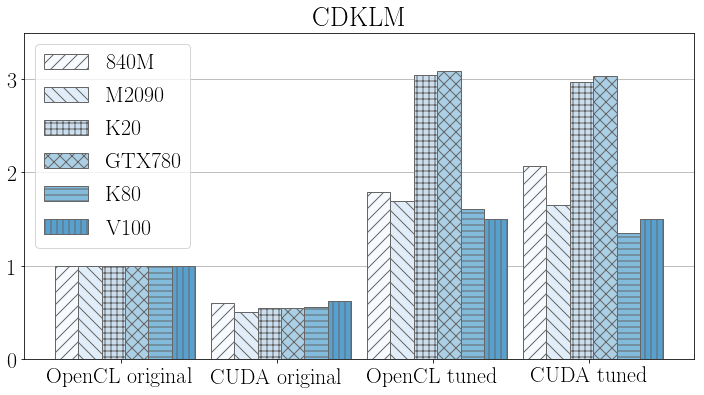

<Figure size 432x288 with 0 Axes>

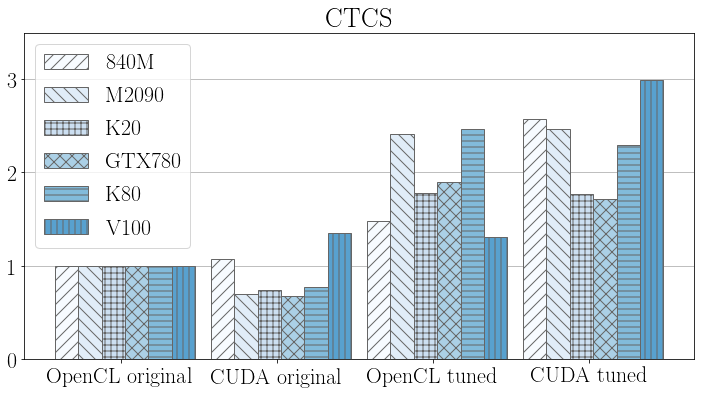

<Figure size 432x288 with 0 Axes>

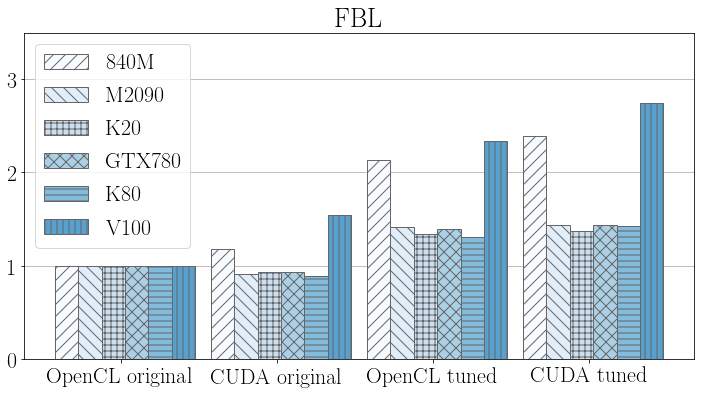

<Figure size 432x288 with 0 Axes>

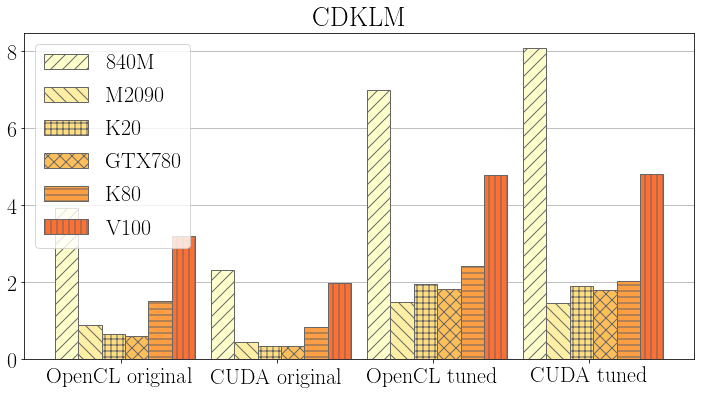

<Figure size 432x288 with 0 Axes>

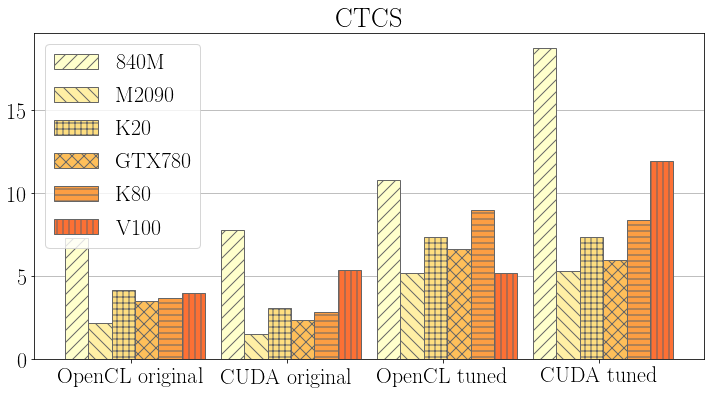

<Figure size 432x288 with 0 Axes>

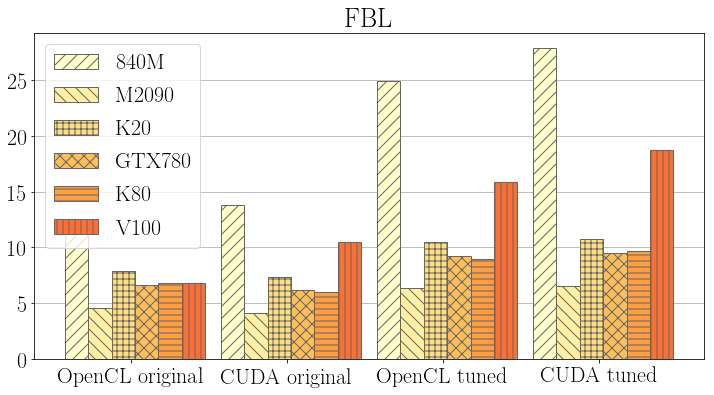

In [34]:
def plot_cuda_vs_opencl_results(opencl_files, cuda_files, title, filename=None, normalization=None):
    assert len(opencl_files) == len(cuda_files)
    
    opencl_df, _ = make_df(opencl_files)
    cuda_df, _ = make_df(cuda_files)
    
    fig = plt.figure()

    fig, ax = plt.subplots(figsize=(12,6))

    num_bars = len(opencl_files)
    bar_width = 0.9 / num_bars
    bar_offset = 0.05

    x = np.arange(4)
    architectures = list(zip(*opencl_files))[1]
    num_architectures = len(architectures)
    
    #print(opencl_df)
    #print(cuda_df)
    
    hatches = ['//', '\\\\', '++', 'xx', '--', '||', '..', '**']
    if (normalization is None):
        cmap = plt.get_cmap("Blues")
    else:
        cmap = plt.get_cmap("YlOrRd")
    colors = cmap(np.arange(num_architectures)/9)
    

    for i, label in enumerate(architectures):
        ocl_values = opencl_df['megacells ' + label]
        cuda_values = cuda_df['megacells ' + label]
        
        if (normalization is None):
            n = 1 / ocl_values[0]
        else:
            n = 1.0/normalization[i]
        
        ocl_values = ocl_values*n
        cuda_values = cuda_values*n
        
        values = [ocl_values[0], cuda_values[0], ocl_values[-1], cuda_values[-1]]
        #print(values)
        
        ax.bar(x+2*bar_offset + (i - num_architectures/2)*bar_width, values, bar_width, 
               label=label, hatch=hatches[i], color=colors[i], linewidth=1, edgecolor='0.4')

    labels = ["OpenCL original", "CUDA original", "OpenCL tuned", "CUDA tuned"]
    plt.xticks(x, labels)#, rotation='vertical')
    plt.grid(axis='y')
    
    if (normalization is None):
        plt.ylim([0, 3.5])
        plt.yticks([0, 1, 2, 3], [0, 1, 2, 3])

    plt.legend(loc='upper left')
    
    plt.title(title)
    if(filename):
        metadata = {
                    'original_files': json.dumps({"OpenCL": opencl_files, "CUDA": cuda_files}), 
                    'original_data': json.dumps({"OpenCL":opencl_df.to_csv(), "CUDA": cuda_df.to_csv()}), 
                    'created': time.strftime("%Y_%m_%d-%H_%M_%S"),
                    'hostname': socket.gethostname()
                    }
        plt.savefig(filename, dpi=300,format='pdf',
                transparent=True, pad_inches=0.0, frameon=None, 
                metadata=metadata)
    
    
plot_cuda_vs_opencl_results(cdklm_opencl, cdklm_cuda, "CDKLM - Normalized megacells", "tuning_cdklm.pdf")
plot_cuda_vs_opencl_results(ctcs_opencl, ctcs_cuda, "CTCS - Normalized megacells", "tuning_ctcs.pdf")
plot_cuda_vs_opencl_results(fbl_opencl, fbl_cuda, "FBL - Normalized megacells", "tuning_fbl.pdf")

plot_cuda_vs_opencl_results(cdklm_opencl, cdklm_cuda, "CDKLM - megacells/bandwidth", "tuning_gflops_cdklm.pdf", normalization=bandwidth)
plot_cuda_vs_opencl_results(ctcs_opencl, ctcs_cuda, "CTCS - megacells/bandwidth", "tuning_gflops_ctcs.pdf", normalization=bandwidth)
plot_cuda_vs_opencl_results(fbl_opencl, fbl_cuda, "FBL - megacells/bandwidth", "tuning_gflops_fbl.pdf", normalization=bandwidth)

## Plot results

In [6]:
def plot_results(files, title, columns=None, labels=None, filename=None):
    df, versions = make_df(files)

    num_bars = len(files)
    bar_width = 0.9 / num_bars
    bar_offset = 0.05
    
    if (columns == None):
        columns = np.arange(len(versions))
        
    if (labels == None):
        labels = df['labels'][columns]
    
    assert (len(labels)== len(columns))
        
        
    label_rotation = 0
    fig_width = 12
    alignment = 'center'
    if len(labels) > 4:
        #label_rotation = 15
        #alignment = 'right'
        fig_width = fig_width*len(labels)/4.0
        
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(fig_width,6))

        
    x = np.arange(len(columns))
    architectures = list(zip(*files))[1]
    num_architectures = len(architectures)
        
    hatches = ['//', '\\\\', '++', 'xx', '--', '||', '..', '**']
    cmap = plt.get_cmap("Greens")
    colors = cmap(np.arange(len(architectures))/9)

    for i, label in enumerate(architectures):
        values = df['megacells ' + label]
        values = values / values[0] #Normalize
        values = values[columns]
        ax.bar(x+2*bar_offset + (i - num_architectures/2)*bar_width, values, bar_width,
               label=label, hatch=hatches[i], color=colors[i], linewidth=1, edgecolor='0.4')

    plt.xticks(x, labels, rotation=label_rotation, horizontalalignment=alignment) #rotation='vertical')
    #for label in axs[0].get_xmajorticklabels() + axs[1].get_xmajorticklabels():
    #    label.set_rotation(30)
    #    label.set_horizontalalignment("right")
    
    plt.grid(axis='y')
    plt.legend(loc='upper left')
    plt.ylim([0, 6])
    plt.yticks([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
    
    plt.title(title)
    if(filename):
        metadata = {
                    'original_files': json.dumps(files), 
                    'original_data': json.dumps(df.to_csv()), 
                    'created': time.strftime("%Y_%m_%d-%H_%M_%S"),
                    'hostname': socket.gethostname()
                    }
        plt.savefig(filename, dpi=300,format='pdf',
                transparent=True, pad_inches=0.0, frameon=None, 
                metadata=metadata)


c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: original_files
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: original_data
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: created
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: hostname
  warnings.warn('Unknown infodict keyword: %s' % k)


<Figure size 432x288 with 0 Axes>

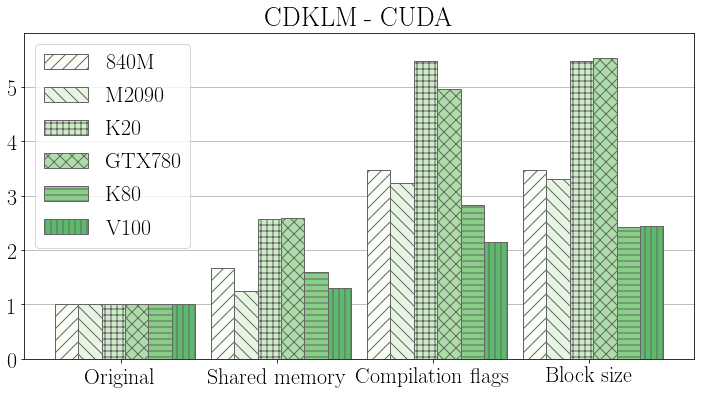

<Figure size 432x288 with 0 Axes>

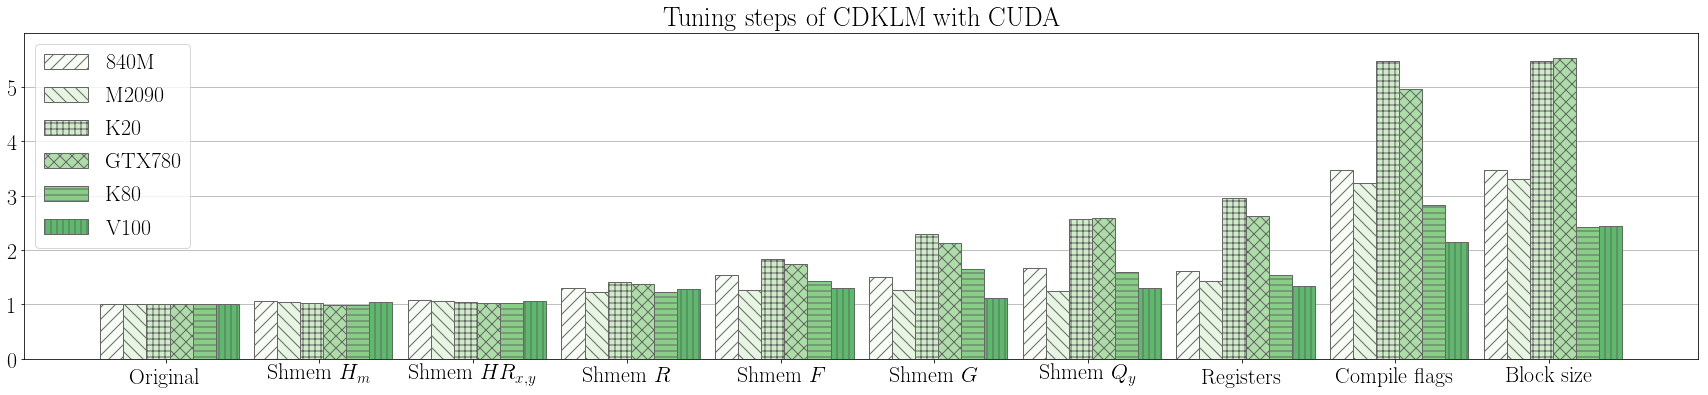

<Figure size 432x288 with 0 Axes>

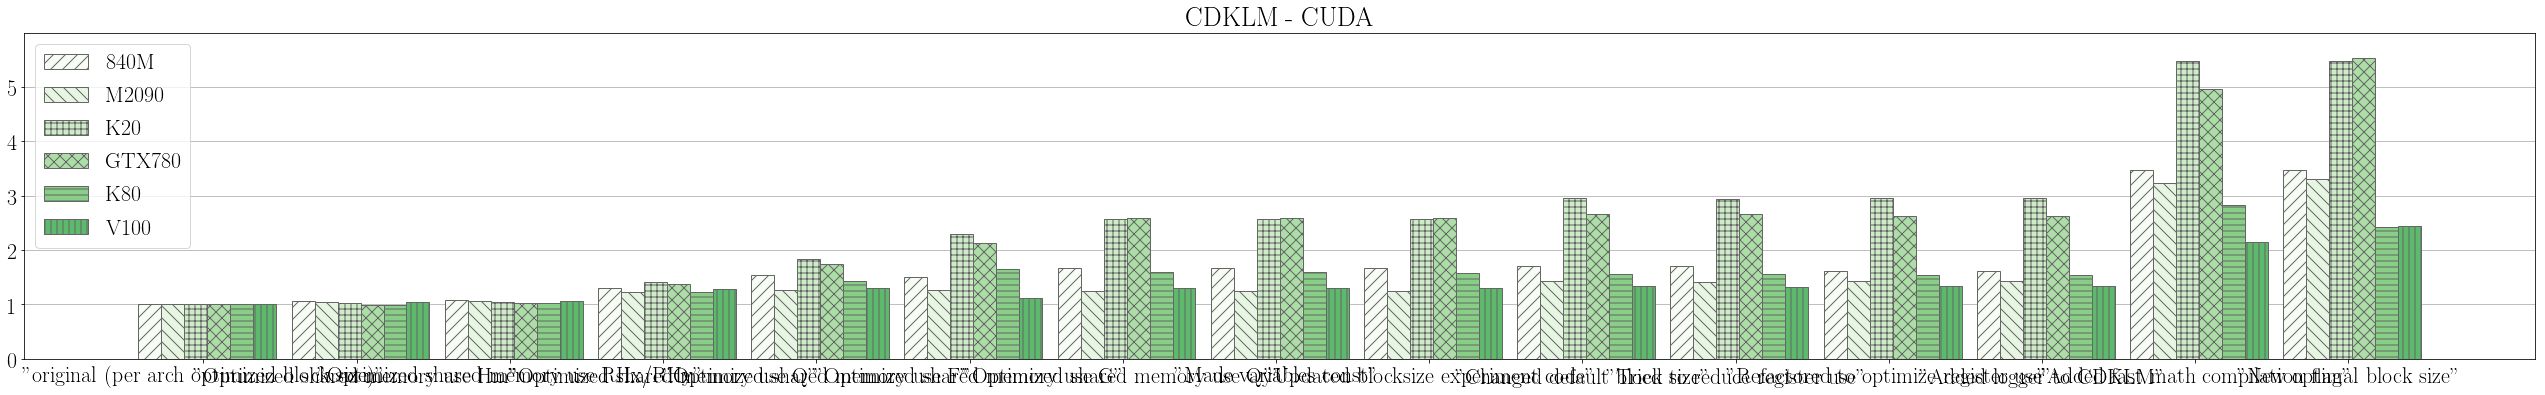

<Figure size 432x288 with 0 Axes>

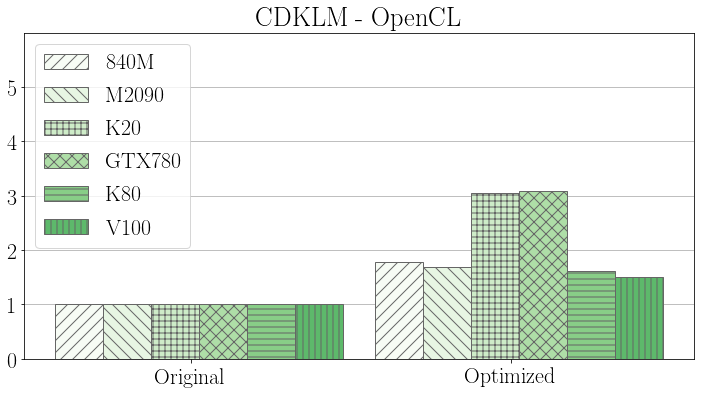

In [7]:
plot_results(cdklm_cuda, "CDKLM - CUDA", columns=[0, 6, 13, 14], labels=["Original", "Shared memory", "Compilation flags", "Block size"], filename="cuda_cdklm.pdf")
shmem = "Shmem "
plot_results(cdklm_cuda, "Tuning steps of CDKLM with CUDA", 
             columns=[0,1,2,3,4,5,6, 12, 13, 14],
             labels=["Original", 
                     shmem + "$H_m$",
                     shmem + "$HR_{x,y}$",
                     shmem + "$R$",
                     shmem + "$F$",
                     shmem + "$G$",
                     shmem + "$Q_y$",
                     "Registers",
                     "Compile flags", 
                     "Block size"], 
             filename="cuda_cdklm_tuning.pdf")
plot_results(cdklm_cuda, "CDKLM - CUDA", 
             columns=None, labels=None, 
             filename="cuda_cdklm_all.pdf")
plot_results(cdklm_opencl, "CDKLM - OpenCL", labels=["Original", "Optimized"], filename="opencl_cdklm.pdf")

c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: original_files
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: original_data
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: created
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: hostname
  warnings.warn('Unknown infodict keyword: %s' % k)


<Figure size 432x288 with 0 Axes>

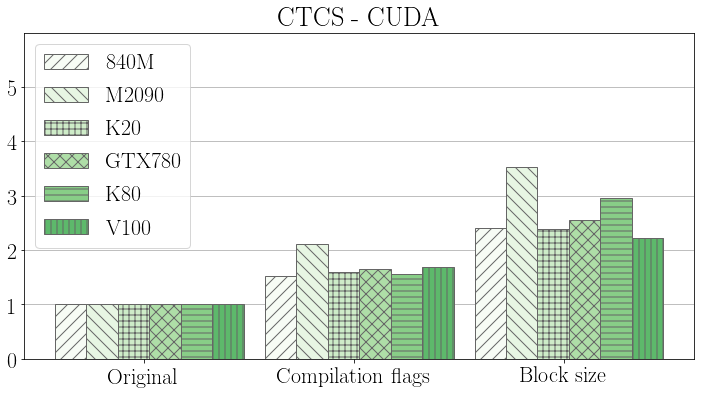

<Figure size 432x288 with 0 Axes>

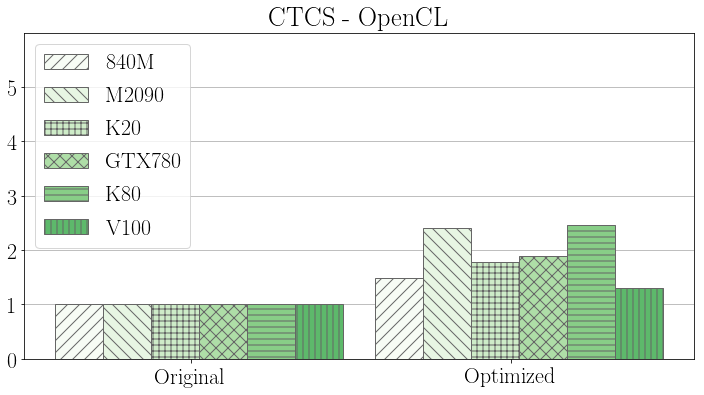

In [8]:
plot_results(ctcs_cuda, "CTCS - CUDA", columns=[0, 7, 8], labels=["Original", "Compilation flags", "Block size"], filename="cuda_ctcs.pdf")
plot_results(ctcs_opencl, "CTCS - OpenCL", labels=["Original", "Optimized"], filename="opencl_ctcs.pdf")

c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: original_files
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: original_data
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: created
  warnings.warn('Unknown infodict keyword: %s' % k)
c:\Users\anbro\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1579: UserWarning: Unknown infodict keyword: hostname
  warnings.warn('Unknown infodict keyword: %s' % k)


<Figure size 432x288 with 0 Axes>

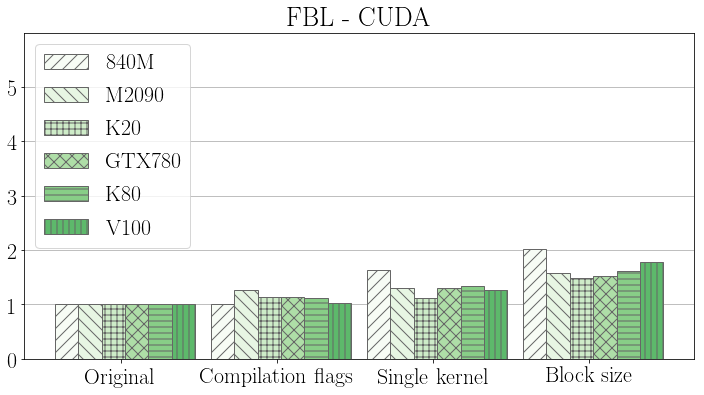

<Figure size 432x288 with 0 Axes>

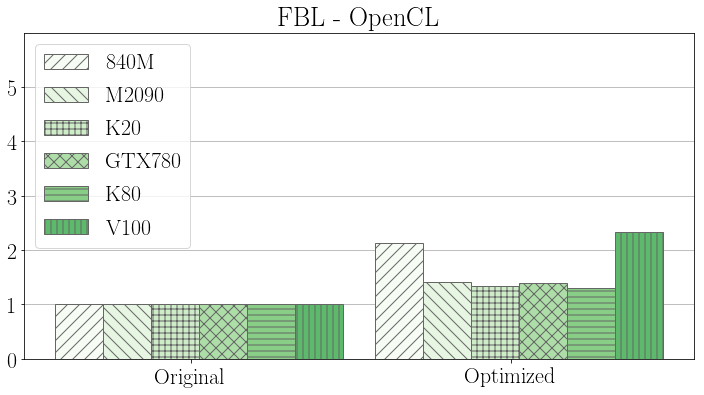

In [9]:
plot_results(fbl_cuda, "FBL - CUDA", labels=["Original", "Compilation flags", "Single kernel", "Block size"], filename="cuda_fbl.pdf")
plot_results(fbl_opencl, "FBL - OpenCL", labels=["Original", "Optimized"], filename="opencl_fbl.pdf")